In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre

In [2]:
datafile = u"/root/LR_ML/modData_Sorted2.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0)

In [4]:
TIP.head()

,CIR,SBP,DBP,BPM,TIP
0,26.0,128,85,80,120
1,26.0,114,62,88,130
2,25.5,100,57,82,120
3,25.5,95,53,60,115
4,25.5,88,49,71,100


In [5]:
modTIP = TIP
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['TIP'], axis = 1))
print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['CIR','SBP', 'DBP', 'BPM'])
modTIP3['TIP'] = TIP['TIP']



Min max scaled data:
 [[1.         0.70175439 0.52941176 0.52631579]
 [1.         0.45614035 0.19117647 0.73684211]
 [0.90909091 0.21052632 0.11764706 0.57894737]
 [0.90909091 0.12280702 0.05882353 0.        ]
 [0.90909091 0.         0.         0.28947368]
 [1.         0.1754386  0.13235294 0.63157895]
 [1.         1.         0.22058824 0.81578947]
 [0.45454545 0.29824561 0.20588235 0.63157895]
 [0.45454545 0.47368421 0.33823529 0.89473684]
 [0.45454545 0.15789474 0.27941176 1.        ]
 [0.45454545 0.31578947 0.08823529 0.89473684]
 [0.45454545 0.43859649 0.29411765 0.76315789]
 [1.         0.57894737 0.36764706 0.36842105]
 [1.         0.38596491 0.64705882 0.36842105]
 [1.         0.9122807  0.64705882 0.5       ]
 [1.         0.71929825 1.         0.36842105]
 [0.27272727 0.21052632 0.22058824 0.44736842]
 [0.27272727 0.38596491 0.30882353 0.26315789]
 [0.27272727 0.47368421 0.17647059 0.07894737]
 [0.27272727 0.45614035 0.19117647 0.65789474]
 [0.27272727 0.35087719 0.22058824 0.

             CIR         SBP         DBP        BPM         TIP
count  36.000000   36.000000   36.000000  36.000000   36.000000
mean   24.066667  114.222222   70.083333  80.222222  123.194444
std     1.786457   13.169469   13.584392   8.642457    9.721315
min    20.500000   88.000000   49.000000  60.000000  100.000000
25%    22.750000  105.750000   62.750000  74.000000  120.000000
50%    23.950000  114.000000   65.000000  81.000000  120.000000
75%    26.000000  122.000000   73.250000  84.250000  126.250000
max    26.000000  145.000000  117.000000  98.000000  150.000000
CIR    0
SBP    0
DBP    0
BPM    0
TIP    0
dtype: int64
          CIR       SBP       DBP       BPM       TIP
CIR  1.000000  0.344128  0.316114 -0.042439  0.230052
SBP  0.344128  1.000000  0.620355  0.116785  0.730763
DBP  0.316114  0.620355  1.000000  0.009816  0.546386
BPM -0.042439  0.116785  0.009816  1.000000  0.258265
TIP  0.230052  0.730763  0.546386  0.258265  1.000000


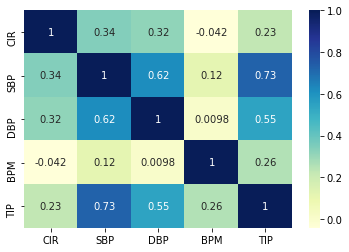

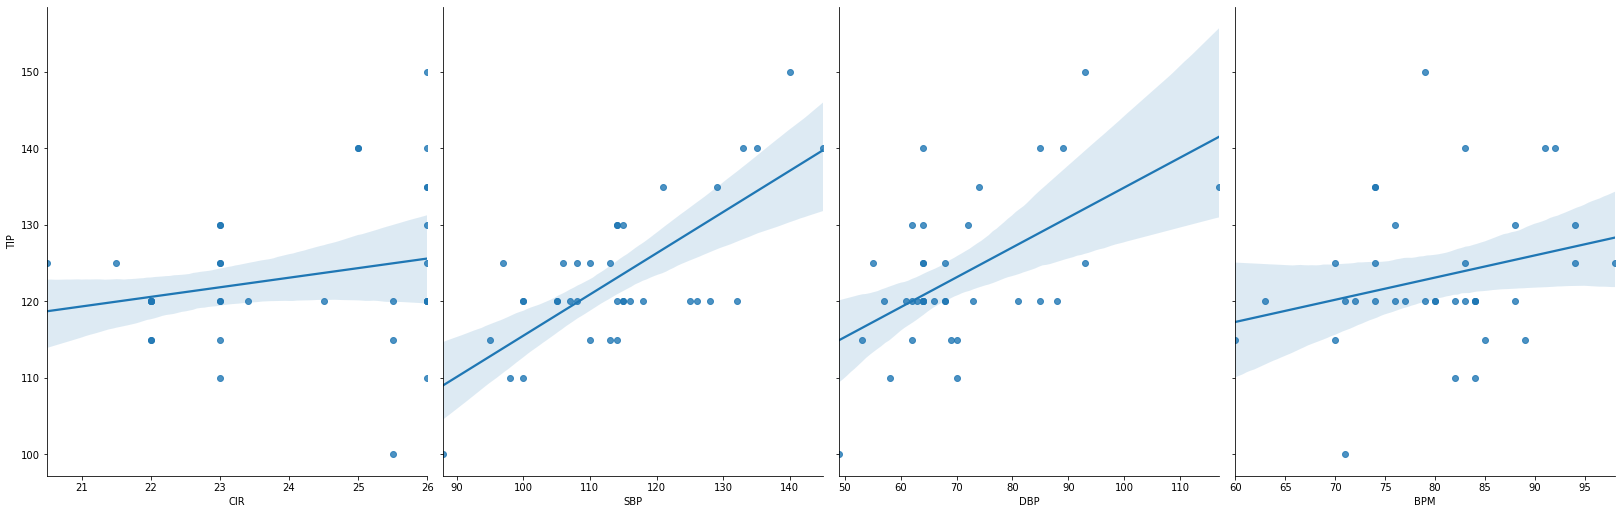

             CIR        SBP        DBP        BPM         TIP
count  36.000000  36.000000  36.000000  36.000000   36.000000
mean    0.648485   0.460039   0.310049   0.532164  123.194444
std     0.324810   0.231043   0.199770   0.227433    9.721315
min     0.000000   0.000000   0.000000   0.000000  100.000000
25%     0.409091   0.311404   0.202206   0.368421  120.000000
50%     0.627273   0.456140   0.235294   0.552632  120.000000
75%     1.000000   0.596491   0.356618   0.638158  126.250000
max     1.000000   1.000000   1.000000   1.000000  150.000000
          CIR       SBP       DBP       BPM       TIP
CIR  1.000000  0.344128  0.316114 -0.042439  0.230052
SBP  0.344128  1.000000  0.620355  0.116785  0.730763
DBP  0.316114  0.620355  1.000000  0.009816  0.546386
BPM -0.042439  0.116785  0.009816  1.000000  0.258265
TIP  0.230052  0.730763  0.546386  0.258265  1.000000


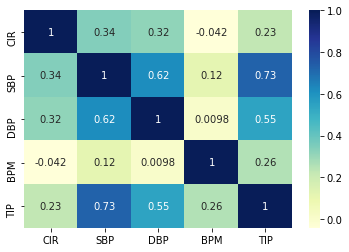

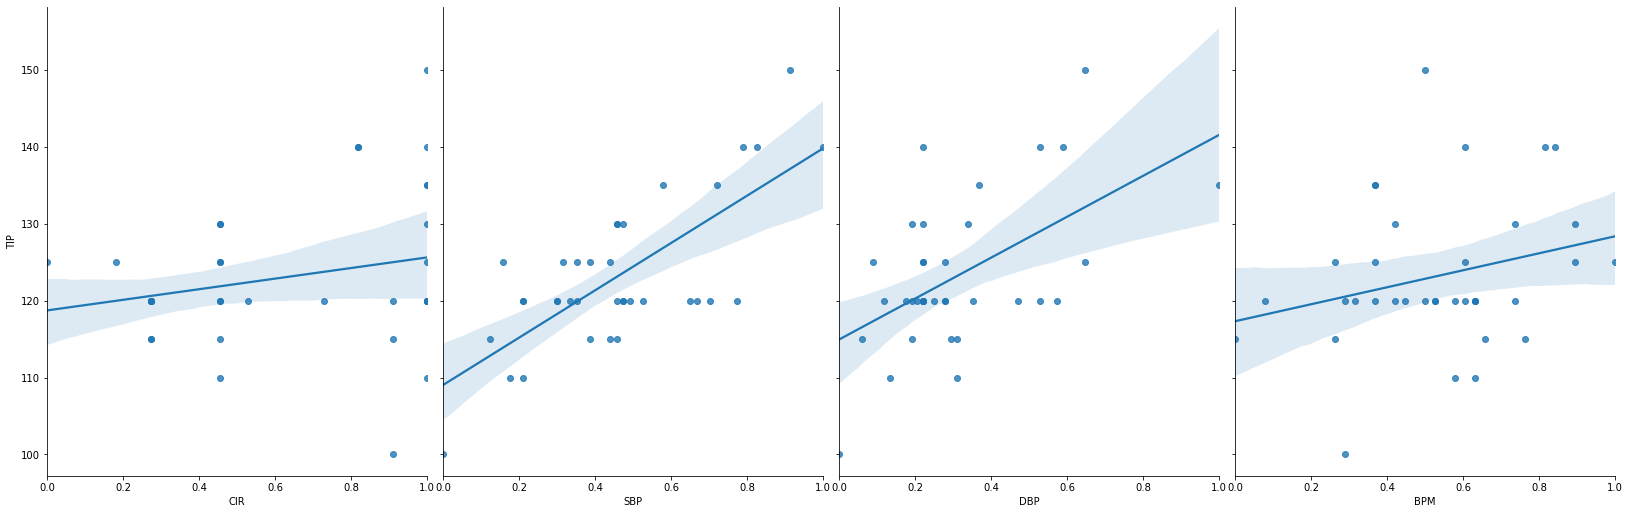

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
sns.pairplot(modTIP, x_vars=['CIR','SBP','DBP', 'BPM'], y_vars='TIP', height=7, aspect=0.8, kind='reg')
plt.show()
print(modTIP3.describe())
print(modTIP3.corr())
sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
sns.pairplot(modTIP3, x_vars=['CIR','SBP','DBP', 'BPM'], y_vars='TIP', height=7, aspect=0.8, kind='reg')  
plt.show()

自變量---源數據: (36, 3) ；  訓練集: (28, 3) ；  測試集: (8, 3)
因變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)
擬合參數:截距 51.93792568529898 ,迴歸係數： [0.51855293 0.03632204 0.12856571]
最佳擬合線: Y =  51.94 + 0.04 * X1 +  0.13 * X2


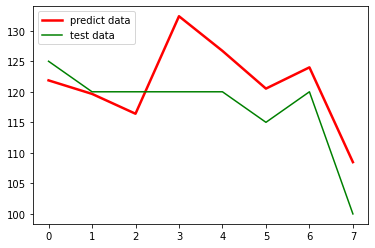

自變量---源數據: (36, 3) ；  訓練集: (28, 3) ；  測試集: (8, 3)
因變量---源數據: (36,) ；  訓練集: (28,) ；  測試集: (8,)
擬合參數:截距 104.32024147862148 ,迴歸係數： [23.00534011  5.70979508  9.92260433]
最佳擬合線: Y =  104.32 + 5.71 * X1 +  9.92 * X2


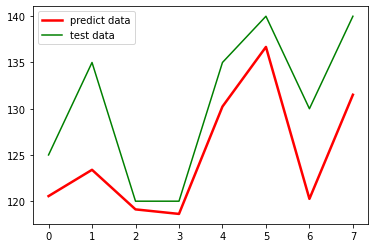

In [7]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.iloc[:,1:4],modTIP.TIP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.iloc[:,1:4].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",TIP.TIP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: Y = ",round(a,2),"+",round(b[1],2),"* X1 + ",round(b[2],2),"* X2")
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(modTIP3.iloc[:,1:4],modTIP.TIP,train_size=0.8)
print("自變量---源數據:",modTIP3.iloc[:,1:4].shape, "；  訓練集:",X_train1.shape, "；  測試集:",X_test1.shape)
print("因變量---源數據:",TIP.TIP.shape, "；  訓練集:",Y_train1.shape, "；  測試集:",Y_test1.shape)
model1 = LinearRegression()
model1.fit(X_train1,Y_train1)
c  = model1.intercept_
d = model1.coef_
print("擬合參數:截距",c,",迴歸係數：",d)
print("最佳擬合線: Y = ",round(c,2),"+",round(d[1],2),"* X1 + ",round(d[2],2),"* X2")
Y_pred1 = model1.predict(X_test1)
plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
plt.legend(loc=2)
plt.savefig(u"/root/LR_ML/modData_Sorted2.png")
plt.show()